In [1]:
import os
import sys
import glob
import gzip
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd

import cartopy.feature as cf
import cartopy.crs as ccrs

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
dir_base = os.path.join('/','media','arturo','Arturo','Data','Brazil','GSMaP')

In [3]:
DATA = xr.open_dataset(os.path.join(dir_base,'NOW','GSMaP_SA_30min_2024_03_01_2024_12_31.nc'))
lon = DATA.lon.values
lat = DATA.lat.values
lon2d, lat2d = np.meshgrid(lon, lat)

PRE = DATA.PRE.values.astype('float16')

In [4]:
PRE_sum = np.nansum(PRE,axis=0)

In [5]:
lat = np.arange(-55,6,0.1)
lon = np.arange(-83,-33,0.1)
lon2d, lat2d = np.meshgrid(lon, lat)

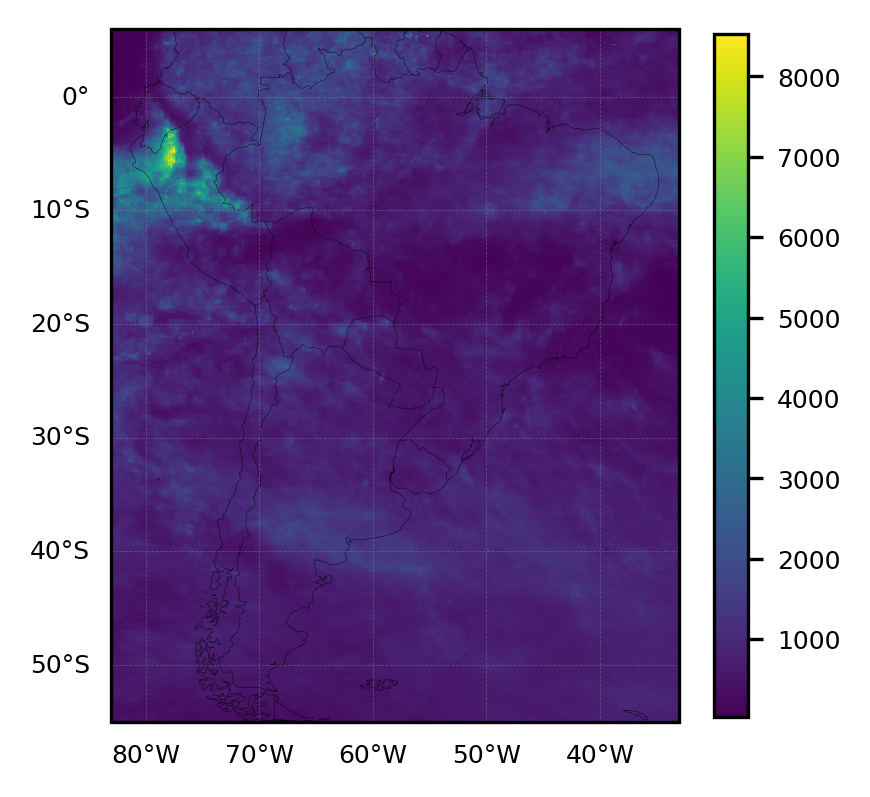

In [6]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(3,3),dpi=300)
gs = gridspec.GridSpec(1,1)

#==================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
# ax1.set_extent([-87,-30,-50,15],crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')

a1 = ax1.pcolormesh(lon2d, lat2d, PRE_sum[::-1,:], cmap='viridis')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

cbar = plt.colorbar(a1, orientation='vertical', pad=0.05, fraction=0.049)
cbar.ax.tick_params(labelsize=6)